In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")
# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

valor de x Tensor("Placeholder_2:0", dtype=float32)


In [8]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)


In [9]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.158732772 W= 0.40949252 b= -0.34883502
Epoch: 0100 cost= 0.149285421 W= 0.39998257 b= -0.280421
Epoch: 0150 cost= 0.140929192 W= 0.3910382 b= -0.21607623
Epoch: 0200 cost= 0.133538082 W= 0.38262594 b= -0.15555817
Epoch: 0250 cost= 0.127000764 W= 0.37471378 b= -0.09863952
Epoch: 0300 cost= 0.121218540 W= 0.3672723 b= -0.045105975
Epoch: 0350 cost= 0.116104312 W= 0.36027336 b= 0.005243718
Epoch: 0400 cost= 0.111580878 W= 0.35369068 b= 0.052598774
Epoch: 0450 cost= 0.107580066 W= 0.34749964 b= 0.09713748
Epoch: 0500 cost= 0.104041502 W= 0.34167668 b= 0.13902724
Epoch: 0550 cost= 0.100911848 W= 0.3362001 b= 0.17842568
Epoch: 0600 cost= 0.098143816 W= 0.33104917 b= 0.21548088
Epoch: 0650 cost= 0.095695697 W= 0.32620463 b= 0.2503323
Epoch: 0700 cost= 0.093530521 W= 0.32164818 b= 0.28311086
Epoch: 0750 cost= 0.091615617 W= 0.3173628 b= 0.31394023
Epoch: 0800 cost= 0.089922085 W= 0.3133322 b= 0.3429354
Epoch: 0850 cost= 0.088424340 W= 0.30954143 b= 0.37020615
Epoch: 0900 co

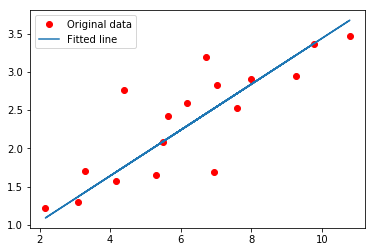

In [12]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),"W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()